Audio Classification using Deep Learning


Importing the required modules



In [2]:
import IPython.display as ipd
import librosa
import librosa.display
import pandas as pd
import os, time, warnings
import seaborn as sns
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv1D,
    MaxPooling1D,
    BatchNormalization,
    Dropout,
    Flatten,
    Conv2D,
    MaxPool2D,
)

warnings.filterwarnings("ignore")

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
log_cols = ["model", "accuracy", "train_time", "pred_time"]
log = pd.DataFrame(columns=["model", "accuracy", "train_time", "pred_time"])

In [4]:
log

,model,accuracy,train_time,pred_time


#Reading the data

In [5]:
ddf = pd.read_csv("/content/drive/MyDrive/UrbanSound8K/metadata/UrbanSound8K.csv")
ddf.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [6]:
# reading the files
audio_dataset_path = "/content/drive/MyDrive/UrbanSound8K/"

# loading the csv
meta_data = pd.read_csv("/content/drive/MyDrive/UrbanSound8K/metadata/UrbanSound8K.csv")
meta_data["class"] = meta_data["class"].replace(to_replace="air_conditioner", value="Air Conditioner")

meta_data["class"] = meta_data["class"].replace(to_replace="car_horn", value="Car Horn")

meta_data["class"] = meta_data["class"].replace(to_replace="children_playing", value="Children Playing")

meta_data["class"] = meta_data["class"].replace(to_replace="dog_bark", value="Dog Bark")

meta_data["class"] = meta_data["class"].replace(to_replace="drilling", value="Drilling")

meta_data["class"] = meta_data["class"].replace(to_replace="engine_idling", value="Engine Idling")

meta_data["class"] = meta_data["class"].replace(to_replace="gun_shot", value="Gun Shot")

meta_data["class"] = meta_data["class"].replace(to_replace="jackhammer", value="Jackhammer")

meta_data["class"] = meta_data["class"].replace(to_replace="siren", value="Siren")

meta_data["class"] = meta_data["class"].replace(to_replace="street_music", value="Street Music")

meta_data.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,Dog Bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,Children Playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,Children Playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,Children Playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,Children Playing


In [7]:
# Numeric value for each class
meta_data.groupby("classID")["class"].unique()

classID
0     [Air Conditioner]
1            [Car Horn]
2    [Children Playing]
3            [Dog Bark]
4            [Drilling]
5       [Engine Idling]
6            [Gun Shot]
7          [Jackhammer]
8               [Siren]
9        [Street Music]
Name: class, dtype: object

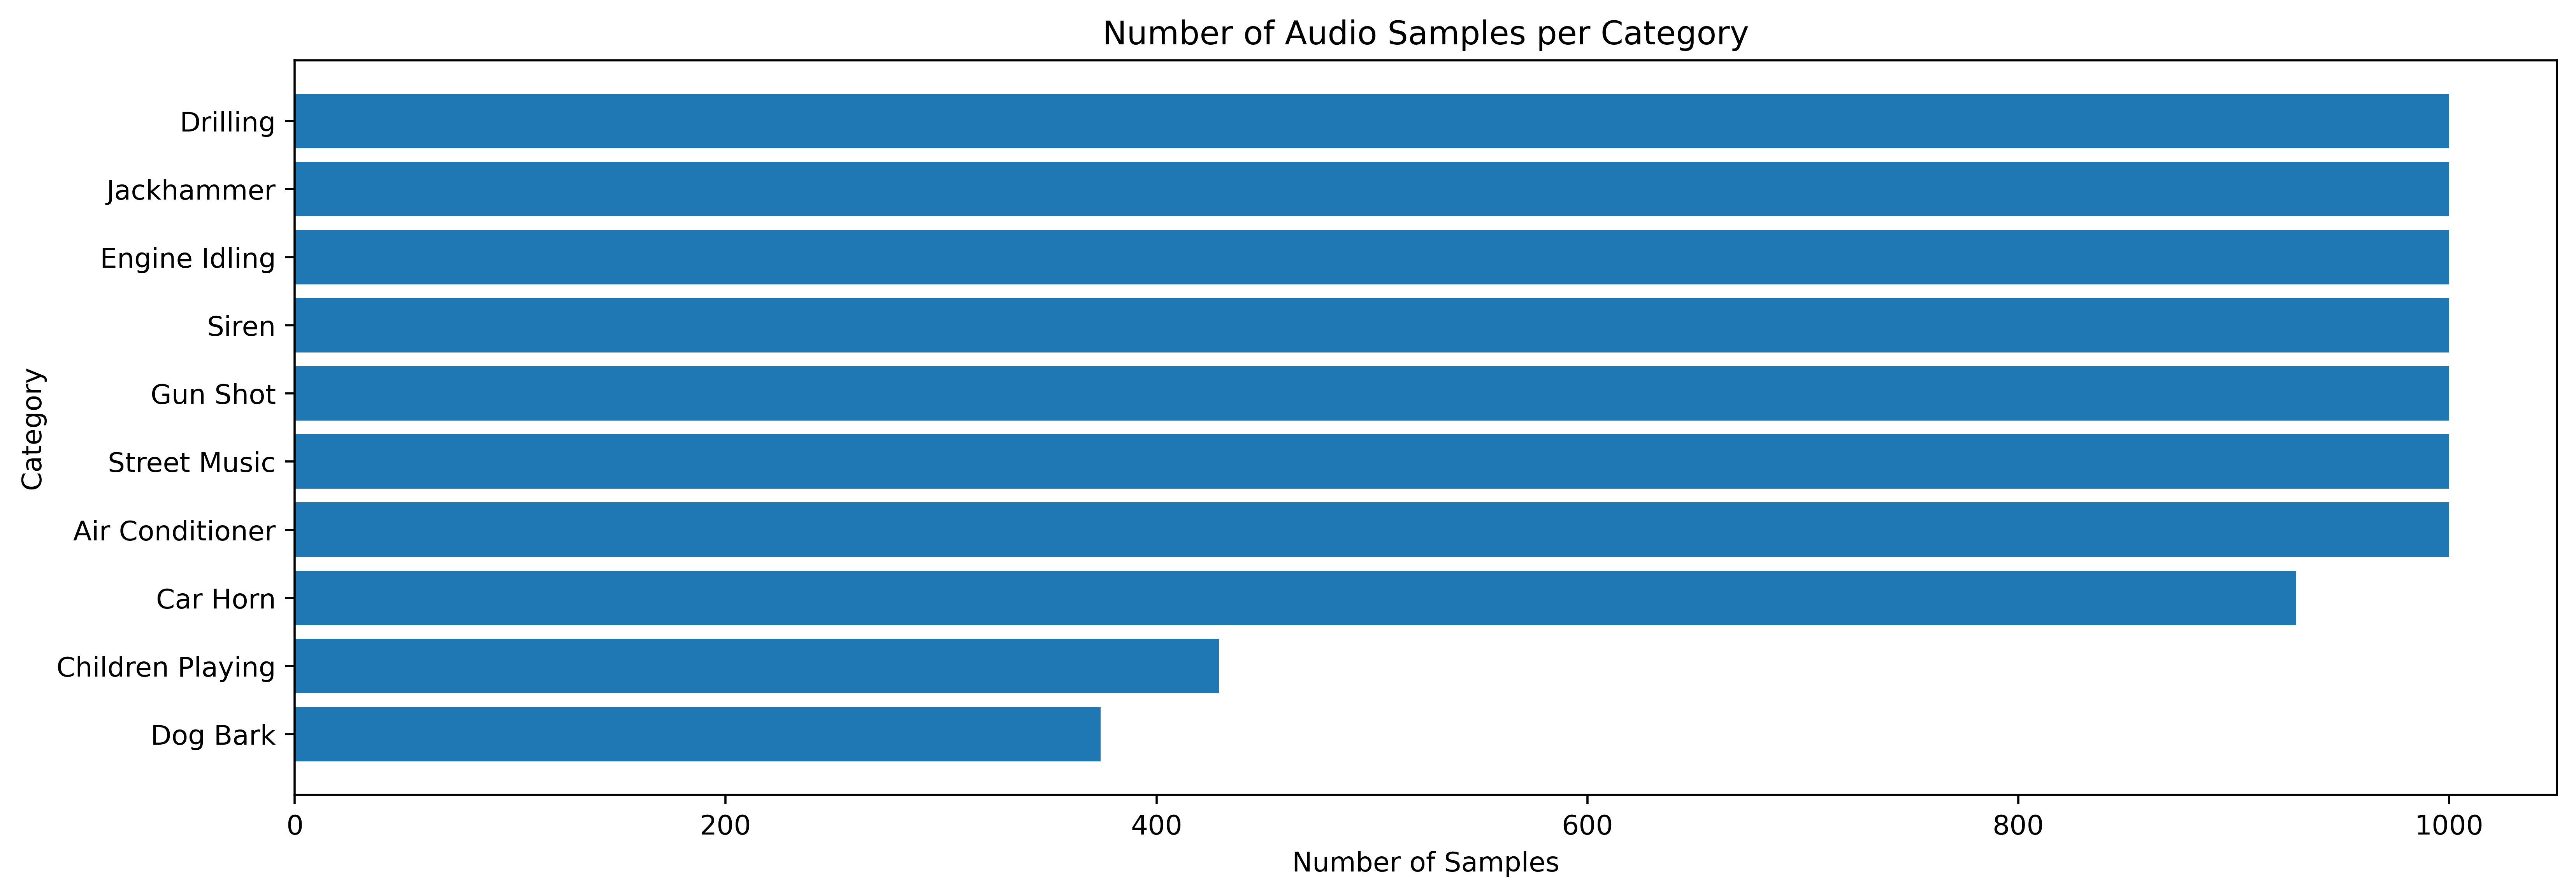

In [ ]:
x = meta_data["class"].unique()
y = meta_data["class"].value_counts(ascending=True)
ind = np.arange(len(y))
# plt.figure()
fig, ax = plt.subplots(figsize=(15, 5))
ax.barh(ind, y) # Bars
ax.set_yticks(ind) # Numeric category
ax.set_yticklabels(x) # Actual class names
plt.gcf().set_dpi(500)
plt.title("Number of Audio Samples per Category")
plt.xlabel("Number of Samples")
plt.ylabel("Category")
plt.show()

#MFCC Visualization

<function matplotlib.pyplot.show(*args, **kw)>

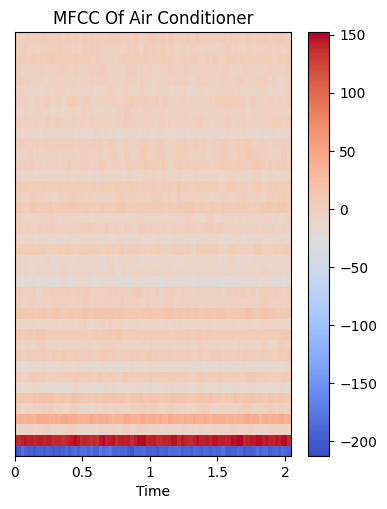

In [ ]:
plt.rcParams["figure.figsize"] = (4, 5)
plt.rcParams["figure.dpi"] = 100
#audio_path = audio_dataset_path +"/content/drive/MyDrive/UrbanSound8K/UrbanSound8K/audio/fold1/127873-0-0-0.wav"
audio_path = "/content/drive/MyDrive/UrbanSound8K/audio/fold1/127873-0-0-0.wav"
(xf, sr) = librosa.load(audio_path)
mfccs = librosa.feature.mfcc(y=xf, sr=sr, n_mfcc=40)
librosa.display.specshow(mfccs, x_axis="time")
plt.colorbar()
plt.tight_layout()
plt.title("MFCC Of Air Conditioner")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

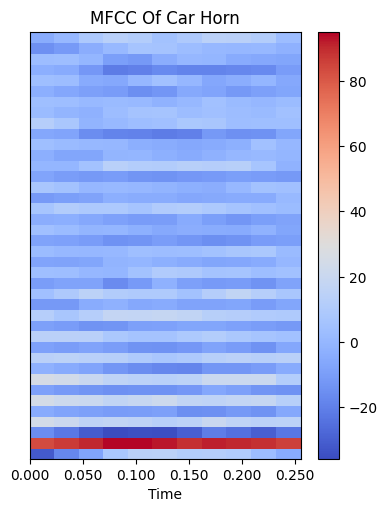

In [ ]:
audio_path = "/content/drive/MyDrive/UrbanSound8K/audio/fold1/156194-1-0-0.wav"
(xf, sr) = librosa.load(audio_path)
mfccs = librosa.feature.mfcc(y=xf, sr=sr, n_mfcc=40)
librosa.display.specshow(mfccs, x_axis="time")
plt.colorbar()
plt.tight_layout()
plt.title("MFCC Of Car Horn")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

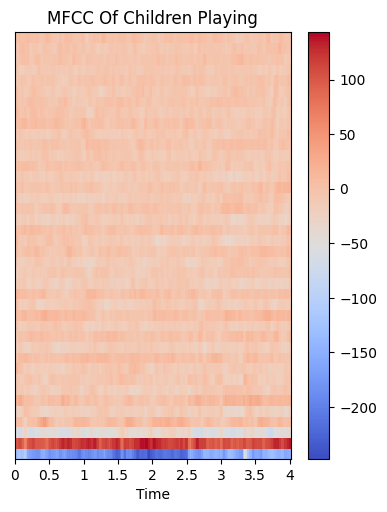

In [ ]:
audio_path = "/content/drive/MyDrive/UrbanSound8K/audio/fold1/105415-2-0-1.wav"
(xf, sr) = librosa.load(audio_path)
mfccs = librosa.feature.mfcc(y=xf, sr=sr, n_mfcc=40)
librosa.display.specshow(mfccs, x_axis="time")
plt.colorbar()
plt.tight_layout()
plt.title("MFCC Of Children Playing")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

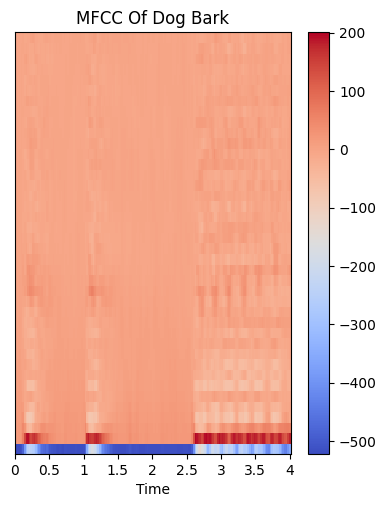

In [ ]:
audio_path = "/content/drive/MyDrive/UrbanSound8K/audio/fold1/101415-3-0-2.wav"
(xf, sr) = librosa.load(audio_path)
mfccs = librosa.feature.mfcc(y=xf, sr=sr, n_mfcc=40)
librosa.display.specshow(mfccs, x_axis="time")
plt.colorbar()
plt.tight_layout()
plt.title("MFCC Of Dog Bark")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

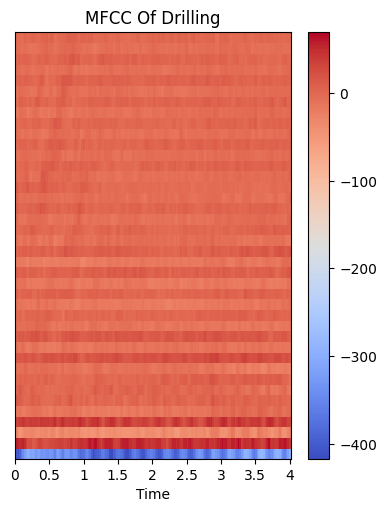

In [ ]:
audio_path = "/content/drive/MyDrive/UrbanSound8K/audio/fold1/14113-4-0-0.wav"
(xf, sr) = librosa.load(audio_path)
mfccs = librosa.feature.mfcc(y=xf, sr=sr, n_mfcc=40)
librosa.display.specshow(mfccs, x_axis="time")
plt.colorbar()
plt.tight_layout()
plt.title("MFCC Of Drilling")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

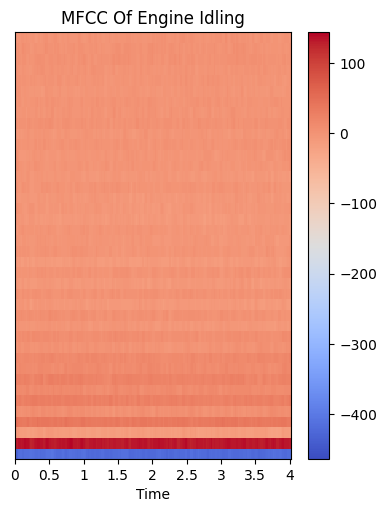

In [ ]:
audio_path ="/content/drive/MyDrive/UrbanSound8K/audio/fold1/103258-5-0-0.wav"
(xf, sr) = librosa.load(audio_path)
mfccs = librosa.feature.mfcc(y=xf, sr=sr, n_mfcc=40)
librosa.display.specshow(mfccs, x_axis="time")
plt.colorbar()
plt.tight_layout()
plt.title("MFCC Of Engine Idling")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

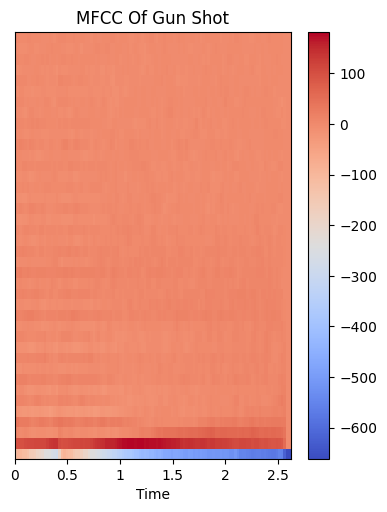

In [ ]:
audio_path =  "/content/drive/MyDrive/UrbanSound8K/audio/fold1/102305-6-0-0.wav"
(xf, sr) = librosa.load(audio_path)
mfccs = librosa.feature.mfcc(y=xf, sr=sr, n_mfcc=40)
librosa.display.specshow(mfccs, x_axis="time")
plt.colorbar()
plt.tight_layout()
plt.title("MFCC Of Gun Shot")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

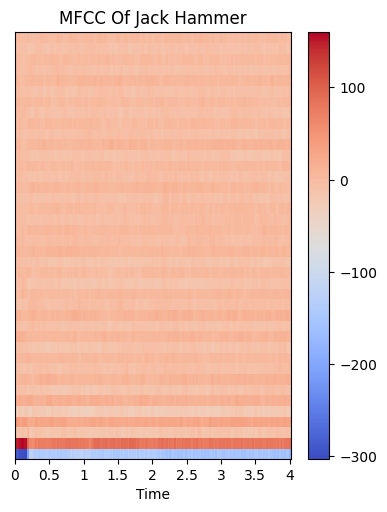

In [ ]:
audio_path ="/content/drive/MyDrive/UrbanSound8K/audio/fold1/103074-7-0-0.wav"
(xf, sr) = librosa.load(audio_path)
mfccs = librosa.feature.mfcc(y=xf, sr=sr, n_mfcc=40)
librosa.display.specshow(mfccs, x_axis="time")
plt.colorbar()
plt.tight_layout()
plt.title("MFCC Of Jack Hammer")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

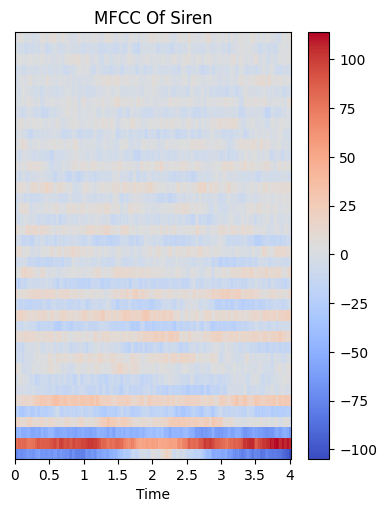

In [ ]:
audio_path = "/content/drive/MyDrive/UrbanSound8K/audio/fold1/106905-8-0-0.wav"
(xf, sr) = librosa.load(audio_path)
mfccs = librosa.feature.mfcc(y=xf, sr=sr, n_mfcc=40)
librosa.display.specshow(mfccs, x_axis="time")
plt.colorbar()
plt.tight_layout()
plt.title("MFCC Of Siren")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

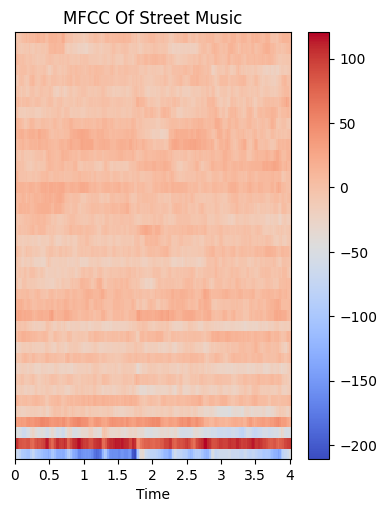

In [ ]:
audio_path =  "/content/drive/MyDrive/UrbanSound8K/audio/fold1/108041-9-0-11.wav"
(xf, sr) = librosa.load(audio_path)
mfccs = librosa.feature.mfcc(y=xf, sr=sr, n_mfcc=40)
librosa.display.specshow(mfccs, x_axis="time")
plt.colorbar()
plt.tight_layout()
plt.title("MFCC Of Street Music")
plt.show

#Feature Extraction and Database Building
#Method
- I have used Librosa to preprocess audio file.
- To do so, I will go through each fold and extract the data from each file using librosa's mfcc function.
- The extracted data is appended in a list and stored in a dataframe.
#The function bellow will extract mfcc feature

In [8]:
for index_num, row in tqdm(meta_data.iterrows()):
  if index_num < 5:
    print(row)

4599it [00:00, 23274.37it/s]

slice_file_name    100032-3-0-0.wav
fsID                         100032
start                           0.0
end                        0.317551
salience                          1
fold                              5
classID                           3
class                      Dog Bark
Name: 0, dtype: object
slice_file_name    100263-2-0-117.wav
fsID                           100263
start                            58.5
end                              62.5
salience                            1
fold                                5
classID                             2
class                Children Playing
Name: 1, dtype: object
slice_file_name    100263-2-0-121.wav
fsID                           100263
start                            60.5
end                              64.5
salience                            1
fold                                5
classID                             2
class                Children Playing
Name: 2, dtype: object
slice_file_name    100263-2-0-126.w

8732it [00:00, 22481.41it/s]


In [11]:
# list containing all the features
extracted = []

# for each row in the csv
for index_num, row in tqdm(meta_data.iterrows()):
    # load the file
    file_name = os.path.join(os.path.abspath("/content/drive/MyDrive/UrbanSound8K/audio/"),"fold" + str(row["fold"]) + "/",str(row["slice_file_name"]),)
    # get file label
    final_class_labels = row["class"]
    # load the audio file
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    # extract the features
    feature = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=128)  # feature.shape -> (128,173)  > 128 - number of MFCC coefficients  
                                                                                                      #> 173 - number of time frames -> length of the audio (in samples) divided by the hop_length
    # feature scaling
    scaled_feature = np.mean(feature.T, axis=0) 
    # store it in a list
    extracted.append([scaled_feature, final_class_labels])

8732it [58:31,  2.49it/s]


#Create a new Dataframe using list

In [12]:
# create a new dataframe
extracted_df = pd.DataFrame(extracted, columns=["feature", "class"])
extracted_df.head()

,feature,class
0,"[-214.95764, 70.502464, -130.70279, -53.116936...",Dog Bark
1,"[-423.7311, 109.2299, -52.872597, 60.827538, 0...",Children Playing
2,"[-458.52844, 121.35432, -46.535675, 51.969467,...",Children Playing
3,"[-413.63254, 101.61351, -35.43868, 53.047146, ...",Children Playing
4,"[-446.38693, 113.68634, -52.4572, 60.349724, 2...",Children Playing


#Data Preprocessing
#Distribute the data to X and Y

In [13]:
X = np.array(extracted_df["feature"].tolist())
y = np.array(extracted_df["class"].tolist())

#Using LabelEncoder() to encode the string labels to an integer

In [14]:
# label encoding to get encoding
le = LabelEncoder()

# transform each category with it's respected label
Y = to_categorical(le.fit_transform(y))

#Split the data into train and test sets

In [15]:
# split the data to train and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=7)

# print the details
print("Number of training samples = ", X_train.shape[0])
print("Number of testing samples = ", X_test.shape[0])

Number of training samples =  6985
Number of testing samples =  1747


#CNN2D
#Preprocessing

In [16]:
xtrain = X_train.reshape(X_train.shape[0], 16, 8, 1) # 6985 records of having dim(16,8,1)
xtest = X_test.reshape(X_test.shape[0], 16, 8, 1)    # 1747 records of having dim(16,8,1)

print("The Shape of X Train", xtrain.shape)
print("The Shape of Y Train", y_train.shape)
print("The Shape of X Test", xtest.shape)
print("The Shape of Y Test", y_test.shape)

The Shape of X Train (6985, 16, 8, 1)
The Shape of Y Train (6985, 10)
The Shape of X Test (1747, 16, 8, 1)
The Shape of Y Test (1747, 10)


#Building the CNN2D Model

In [17]:
CNN2D_Model = Sequential()
CNN2D_Model.add(Conv2D(64, (3, 3), padding="same", activation="tanh", input_shape=(16, 8, 1)))
CNN2D_Model.add(MaxPool2D(pool_size=(2, 2)))
CNN2D_Model.add(Conv2D(130, (3, 3), padding="same", activation="tanh"))
CNN2D_Model.add(MaxPool2D(pool_size=(2, 2)))
CNN2D_Model.add(Dropout(0.1))
CNN2D_Model.add(Flatten())
CNN2D_Model.add(Dense(1024, activation="tanh"))
CNN2D_Model.add(Dense(10, activation="softmax"))
CNN2D_Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 8, 64)         640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 4, 64)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 4, 130)         75010     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 2, 130)        0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 4, 2, 130)         0         
                                                                 
 flatten (Flatten)           (None, 1040)              0

#Compiling the Model

In [18]:
CNN2D_Model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

#Fitting the Model

In [19]:
t = time.time()

CNN2D_Results = CNN2D_Model.fit(xtrain, y_train, epochs=10, batch_size=40, validation_data=(xtest, y_test))

train_hist = pd.DataFrame(CNN2D_Results.history)
train_time = round(time.time() - t, 2)

Epoch 1/10
175/175 [==============================] - 8s 42ms/step - loss: 1.0941 - accuracy: 0.6293 - val_loss: 0.6697 - val_accuracy: 0.7819
Epoch 2/10
175/175 [==============================] - 7s 41ms/step - loss: 0.5675 - accuracy: 0.8097 - val_loss: 0.5103 - val_accuracy: 0.8363
Epoch 3/10
175/175 [==============================] - 7s 41ms/step - loss: 0.4031 - accuracy: 0.8673 - val_loss: 0.4436 - val_accuracy: 0.8603
Epoch 4/10
175/175 [==============================] - 7s 41ms/step - loss: 0.3098 - accuracy: 0.8932 - val_loss: 0.5142 - val_accuracy: 0.8386
Epoch 5/10
175/175 [==============================] - 7s 41ms/step - loss: 0.2464 - accuracy: 0.9175 - val_loss: 0.4069 - val_accuracy: 0.8746
Epoch 6/10
175/175 [==============================] - 9s 54ms/step - loss: 0.1985 - accuracy: 0.9337 - val_loss: 0.4984 - val_accuracy: 0.8409
Epoch 7/10
175/175 [==============================] - 7s 41ms/step - loss: 0.1825 - accuracy: 0.9372 - val_loss: 0.5294 - val_accuracy: 0.8655

In [23]:
print("Training time =",train_time,"sec")

Training time = 83.03 sec


#Result

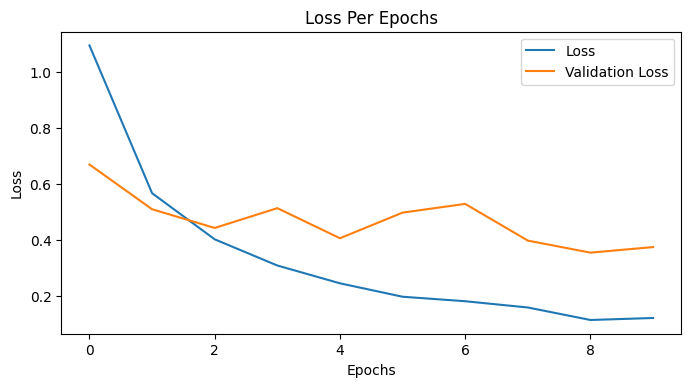

In [21]:
plt.figure(figsize=(8, 4), dpi=100)
plt.plot(train_hist[["loss", "val_loss"]])
plt.legend(["Loss", "Validation Loss"])
plt.title("Loss Per Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

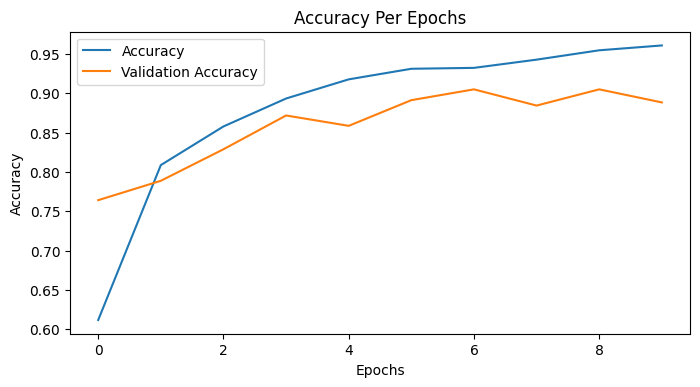

In [ ]:
plt.figure(figsize=(8, 4), dpi=100)
plt.plot(train_hist[["accuracy", "val_accuracy"]])
plt.legend(["Accuracy", "Validation Accuracy"])
plt.title("Accuracy Per Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

#CNN2D Prediction Function

In [24]:
acc = CNN2D_Model.evaluate(xtest, y_test, verbose=0)
t = time.time()
y_pred = CNN2D_Model.predict(xtest, verbose=0)
pred = round(time.time() - t, 2)
log_entry = pd.DataFrame([["CNN2D", acc[1] * 100, train_time, pred]], columns=log_cols)
log = log.append(log_entry)

In [25]:
print("Prediction time =",pred,"sec")

Prediction time = 0.53 sec


In [40]:
# function to predict the feature
def CNN2D_Predict(file_name):
    # load the audio file
    audio_data, sample_rate = librosa.load(file_name, res_type="kaiser_fast") # to reduce load time(resample_type)   ->  (default is "kaiser_best")
    # get the feature
    feature = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=128)
    # scale the features
    feature_scaled = np.mean(feature.T, axis=0)
    # array of features
    prediction_feature = np.array([feature_scaled])
    # reshaping the features
    final_prediction_feature = prediction_feature.reshape(prediction_feature.shape[0], 16, 8, 1)
    # get the id of label using argmax
    predicted_vector = np.argmax(CNN2D_Model.predict(final_prediction_feature), axis=1) # Returns the indices of the maximum values
    # get the class label from class id
    predicted_class = le.inverse_transform(predicted_vector)
    # display the result
    print("predicted sound is of class --> ", predicted_class[0])

#Testing the Model on Sample audio

In [41]:
# File name
file_name = "/content/drive/MyDrive/UrbanSound8K/audio/fold5/49312-2-0-10.wav"
# get the output
CNN2D_Predict(file_name)
# play the file
ipd.Audio(file_name)

predicted sound is of class -->  Children Playing


## CNN1D

## Preprocessing

In [42]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.1, stratify=y, random_state=7)

## Building the CNN1D Model


In [43]:
CNN1D_Model = Sequential()
CNN1D_Model.add(Conv1D(256, 5, strides=1, padding="same", activation="relu", input_shape=(Xtrain.shape[1], 1),))
CNN1D_Model.add(BatchNormalization())
CNN1D_Model.add(MaxPooling1D(3, strides=2, padding="same"))
CNN1D_Model.add(Conv1D(256, 5, strides=1, padding="same", activation="relu"))
CNN1D_Model.add(Dropout(0.3))
CNN1D_Model.add(MaxPooling1D(3, strides=2, padding="same"))
CNN1D_Model.add(Conv1D(128, 5, strides=1, padding="same", activation="relu"))
CNN1D_Model.add(Dropout(0.3))
CNN1D_Model.add(MaxPooling1D(3, strides=2, padding="same"))
CNN1D_Model.add(Conv1D(64, 5, strides=1, padding="same", activation="relu"))
CNN1D_Model.add(Dropout(0.3))
CNN1D_Model.add(MaxPooling1D(3, strides=2, padding="same"))
CNN1D_Model.add(Flatten())
CNN1D_Model.add(Dense(units=1024, activation="relu"))
CNN1D_Model.add(Dropout(0.3))
CNN1D_Model.add(Dense(units=10, activation="softmax"))
CNN1D_Model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 128, 256)          1536      
                                                                 
 batch_normalization (BatchN  (None, 128, 256)         1024      
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 64, 256)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 64, 256)           327936    
                                                                 
 dropout_1 (Dropout)         (None, 64, 256)           0         
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 32, 256)         

## Compile the Model

In [44]:
CNN1D_Model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

## Fitting the Model

In [46]:
t = time.time()

CNN1D_Results = CNN1D_Model.fit(Xtrain, Ytrain, batch_size=40, epochs=10, validation_data=(Xtest, Ytest))

train_hist = pd.DataFrame(CNN1D_Results.history)
train_time = round(time.time() - t, 2)


Epoch 1/10
197/197 [==============================] - 44s 223ms/step - loss: 1.0976 - accuracy: 0.6200 - val_loss: 1.0305 - val_accuracy: 0.6819
Epoch 2/10
197/197 [==============================] - 45s 231ms/step - loss: 0.9058 - accuracy: 0.6876 - val_loss: 0.9156 - val_accuracy: 0.7346
Epoch 3/10
197/197 [==============================] - 44s 222ms/step - loss: 0.8155 - accuracy: 0.7161 - val_loss: 0.7547 - val_accuracy: 0.8009
Epoch 4/10
197/197 [==============================] - 44s 222ms/step - loss: 0.6844 - accuracy: 0.7711 - val_loss: 0.6711 - val_accuracy: 0.8192
Epoch 5/10
197/197 [==============================] - 44s 223ms/step - loss: 0.6315 - accuracy: 0.7814 - val_loss: 0.6952 - val_accuracy: 0.8124
Epoch 6/10
197/197 [==============================] - 45s 230ms/step - loss: 0.6026 - accuracy: 0.7924 - val_loss: 0.6040 - val_accuracy: 0.8558
Epoch 7/10
197/197 [==============================] - 44s 221ms/step - loss: 0.5636 - accuracy: 0.8066 - val_loss: 0.5169 - val_ac

In [47]:
train_time

502.16

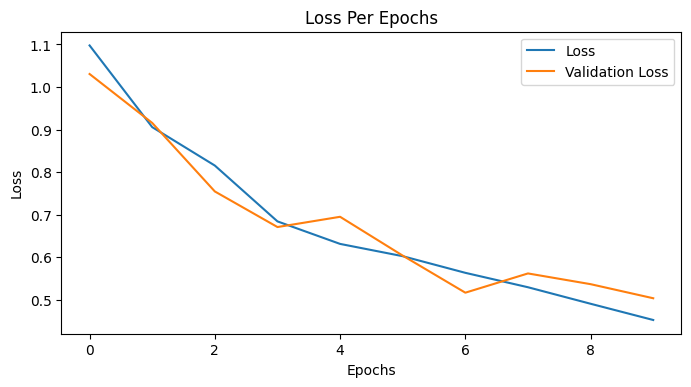

In [48]:
plt.figure(figsize=(8, 4), dpi=100)
plt.plot(train_hist[["loss", "val_loss"]])
plt.legend(["Loss", "Validation Loss"])
plt.title("Loss Per Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()


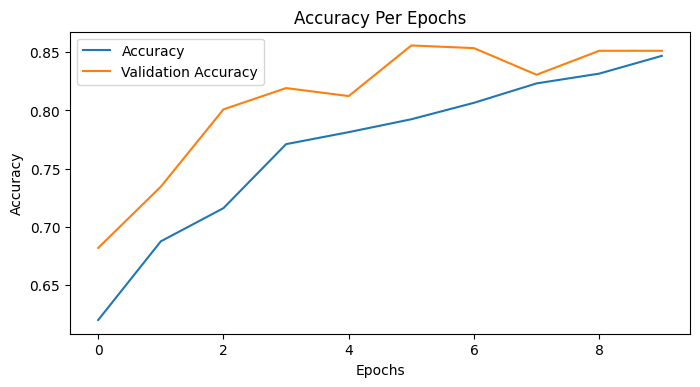

In [49]:
plt.figure(figsize=(8, 4), dpi=100)
plt.plot(train_hist[["accuracy", "val_accuracy"]])
plt.legend(["Accuracy", "Validation Accuracy"])
plt.title("Accuracy Per Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()


In [50]:
acc = CNN1D_Model.evaluate(Xtest, Ytest, verbose=0)
t = time.time()
y_pred = CNN1D_Model.predict(Xtest, verbose=0)
pred = round(time.time() - t, 2)
logs = pd.DataFrame([["CNN1D", acc[1] * 100, train_time, pred]], columns=log_cols)
log = log.append(logs)


In [51]:
print("Prediction time =",pred,"sec")

Prediction time = 1.04 sec


## Audio File Prediction Function

In [62]:
# function to predict the feature
def CNN1D_Predict(file_name):
    # load the audio file
    audio_data, sample_rate = librosa.load(file_name, res_type="kaiser_fast")
    # get the feature
    feature = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=128)
    # scale the features
    feature_scaled = np.mean(feature.T, axis=0)
    # array of features
    prediction_feature = np.array([feature_scaled])
    # expand dims
    final_prediction_feature = np.expand_dims(prediction_feature, axis=2)
    # get the id of label using argmax
    predicted_vector = np.argmax(CNN1D_Model.predict(final_prediction_feature), axis=1)
    # get the class label from class id
    predicted_class = le.inverse_transform(predicted_vector)
    # display the result
    print("predicted sound is of class  --> ", predicted_class[0])


## Testing the Model on Sample audio


In [63]:
# File name
file_name = "/content/drive/MyDrive/UrbanSound8K/audio/fold1/103074-7-0-2.wav"
# get the output
CNN1D_Predict(file_name)
# play the file
ipd.Audio(file_name)


predicted sound is of class  -->  Jackhammer


##Accuracy Comparison

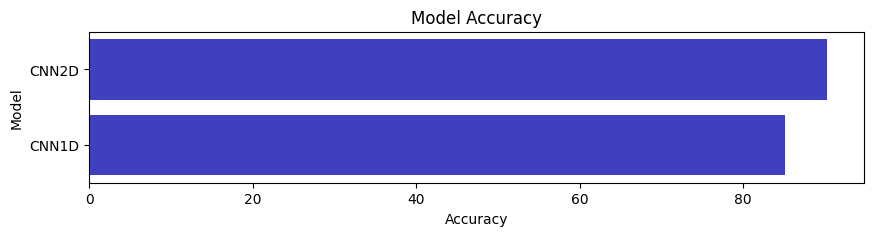

In [54]:
plt.rcParams["figure.figsize"] = (10, 2)
plt.rcParams["figure.dpi"] = 100

ax = sns.barplot(x="accuracy", y="model", data=log, color="b", saturation=0.5)
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.title("Model Accuracy")
plt.show()

##Training Time Comparison

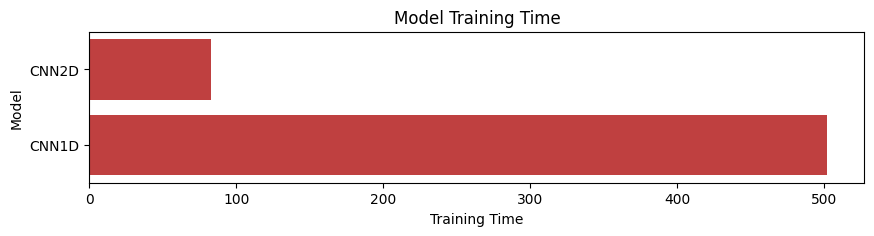

In [59]:
ax = sns.barplot(x="train_time", y="model", data=log, color='r',saturation=0.5)
plt.xlabel("Training Time")
plt.ylabel("Model")
plt.title("Model Training Time")
plt.show()


##Prediction Time Comparison

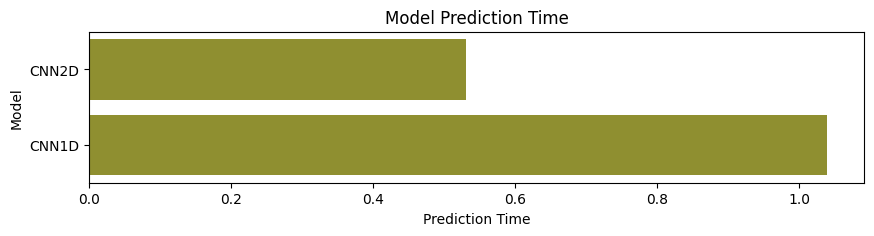

In [58]:
ax = sns.barplot(x="pred_time", y="model", data=log, color='y',saturation=0.5)
plt.xlabel("Prediction Time")
plt.ylabel("Model")
plt.title("Model Prediction Time")
plt.show()
